# Data Loader

This notebook showcases how the data is loaded and used for our experiments.

In [2]:
from idv import datamodule

## In-Distribution Data Set

In [3]:
cxr14 = datamodule.CHESTXRAY14
cxr14.load()

## Out-of-Distribution Data Sets

In [4]:
irma = datamodule.irma.Irma(cache_dir="/space/wollek", chest=False)
irma.load()

boneage = datamodule.rsna_bone_age.RSNA_Bone_Age(cache_dir="/space/wollek")
boneage.load()

mura = datamodule.mura.Mura(cache_dir="/space/wollek")
mura.load()

ImageNet = datamodule.imagenet.ImageNet(cache_dir="/space/wollek")
ImageNet.load()

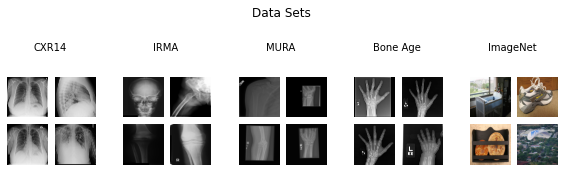

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def plot_datasets():
    fig = plt.figure(constrained_layout=True, figsize=(8, 3))
    fig.suptitle("Data Sets", fontsize=12)
    subfigs = fig.subfigures(1, 5)
    for outerind, (subfig, paths, name) in enumerate(
        zip(subfigs.flat, 
            [cxr14.df.sample(4).Path,
             irma.df.sample(4).Path,
             mura.df.sample(4).Path,
             boneage.df.sample(4).Path,
             ImageNet.df_train.sample(4).Path],
            ["CXR14", "IRMA", "MURA", "Bone Age", "ImageNet"])):
        subfig.suptitle(name, fontsize=10, y=0.9)
        
        grid = ImageGrid(subfig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1)  # pad between axes in inch.)

        for ax, path in zip(grid, paths):
            ax.imshow(boneage.load_image(path), extent=(0, 250, 0, 250))
            ax.axis("off")
plot_datasets()

## DataModule

We use [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/).  
The DataModule controls both PyTorch Datasets and DataLoaders.

In [6]:
# Without OOD Data
dm = datamodule.DataModule(batch_size=2, size=224)

In [7]:
dm.setup()

/space/wollek/virtualenvs/a-knee-cannot-have-lung-disease/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:95: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/space/wollek/virtualenvs/a-knee-cannot-have-lung-disease/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:88: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


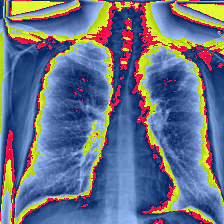

In [8]:
import torchvision

train_loader = dm.train_dataloader()
torchvision.transforms.functional.to_pil_image(next(iter(train_loader))[0][0][0])

217818 3088


/space/wollek/virtualenvs/a-knee-cannot-have-lung-disease/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:95: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/space/wollek/virtualenvs/a-knee-cannot-have-lung-disease/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:88: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


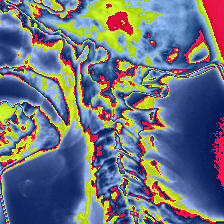

In [9]:
# With OOD Data
dm = datamodule.DataModule(batch_size=2, size=224,
                           outlier_exposure=True, exposure_dataset="imagenet_irma")
dm.setup()
train_loader = dm.train_dataloader()
torchvision.transforms.functional.to_pil_image(dm.train_dataset[-1][0][0])